In this post I will share an example that uses Principal Component Analysis as a dimension reduction tool to prepare the data for logistic regression prediction in python.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as ex
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [2]:
df=pd.read_csv('/content/finalmerged.csv')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df = df.drop(['customerid', 'month_approved_loan'], axis = 1)
df = df.dropna()
df.head() # Inspect the first 5 rows

,longitude_gps,latitude_gps,bank_branch_clients,loannumber,loanamount,totaldue,termdays,good_bad_flag,referred,realage,...,employment_status_client_Contract,employment_status_client_Permanent,employment_status_client_Retired,employment_status_client_Self-Employed,employment_status_client_Student,employment_status_client_Unemployed,employment_status_client_Unknown,is_late_for_firstpay,exceeds_loan_term_days,TipoInteres
0,3.319219,6.528604,0,2,10000.0,13000.0,30,1,1,48,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
1,3.325598,7.119403,0,2,10000.0,13000.0,30,0,0,36,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
2,5.746100,5.563174,0,4,10000.0,13000.0,30,1,0,35,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
3,5.746100,5.563174,0,4,10000.0,13000.0,30,1,0,35,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
4,5.746100,5.563174,0,4,10000.0,13000.0,30,1,0,35,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [3]:
df = df.drop(['longitude_gps','latitude_gps', 'referred', 'bank_account_Current', 'level_of_education_clients_Primary', 'bank_name_client_Access Bank', 'bank_name_client_Diamond Bank', 'bank_name_client_EcoBank', 'bank_name_client_FCMB', 'bank_name_client_Fidelity Bank', 'bank_name_client_First Bank', 'bank_name_client_Heritage Bank', 'bank_name_client_Keystone Bank' , 'bank_name_client_Skye Bank', 'bank_name_client_Stanbic IBTC' , 'bank_name_client_Standard Chartered', 'bank_name_client_Sterling Bank' ,'bank_name_client_UBA', 'bank_name_client_Union Bank', 'bank_name_client_Unity Bank', 'bank_name_client_Wema Bank', 'bank_name_client_Zenith Bank', 'employment_status_client_Contract', 'employment_status_client_Retired','employment_status_client_Student' ,'employment_status_client_Unemployed' ], axis =1 )

In [4]:
df.head() # Inspect the first 5 rows

,bank_branch_clients,loannumber,loanamount,totaldue,termdays,good_bad_flag,realage,TipoInteresAhora,bank_account_Other,bank_account_Savings,...,level_of_education_clients_Post-Graduate,level_of_education_clients_Secondary,level_of_education_clients_Unknown,bank_name_client_GT Bank,employment_status_client_Permanent,employment_status_client_Self-Employed,employment_status_client_Unknown,is_late_for_firstpay,exceeds_loan_term_days,TipoInteres
0,0,2,10000.0,13000.0,30,1,48,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0
1,0,2,10000.0,13000.0,30,0,36,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0
2,0,4,10000.0,13000.0,30,1,35,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
3,0,4,10000.0,13000.0,30,1,35,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
4,0,4,10000.0,13000.0,30,1,35,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [5]:
x = df.loc[:, df.columns != 'good_bad_flag'] # as x variable - the features
x=StandardScaler().fit_transform(x) # standarize the variables
y=df['good_bad_flag'] # assign y variable - the target 
X_train, X_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=42)

In [7]:
from sklearn.ensemble import RandomForestClassifier

feature_names = [f"feature {i}" for i in range(x.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [15]:
print(feature_names)

['feature 0', 'feature 1', 'feature 2', 'feature 3', 'feature 4', 'feature 5', 'feature 6', 'feature 7', 'feature 8', 'feature 9', 'feature 10', 'feature 11', 'feature 12', 'feature 13', 'feature 14', 'feature 15', 'feature 16', 'feature 17', 'feature 18', 'feature 19']


# Feature importance based on mean decrease in impurity

In [9]:
import time


start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.036 seconds


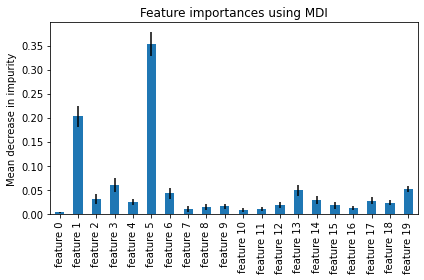

In [10]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

# Feature importance based on feature permutation

Permutation feature importance overcomes limitations of the impurity-based feature importance: they do not have a bias toward high-cardinality features and can be computed on a left-out test set

In [11]:
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    forest, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)

Elapsed time to compute the importances: 10.595 seconds


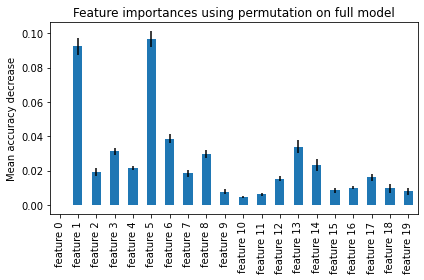

In [12]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()